In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [125]:
def rey_num(D, f_w_perim, s=0.014, rho=997, mu=1.002e-3, g=9.81):
    alpha = f_w_perim * np.pi
    P = alpha * D
    A = (np.power(D, 2) / 4) * (alpha - np.sin(2 * alpha) / 2)
    D_h = 4 * (A / P)

    temp = 2 * g * D_h * s
    num = rho * np.power(temp, 4) * D_h
    den = np.power(0.316, 4) * mu
    v = np.power(num / den, 1 / 7)

    re = rho * v * D_h / mu
    return re

In [121]:
fraction_w_perim = np.arange(0.02, 0.4, 0.01)

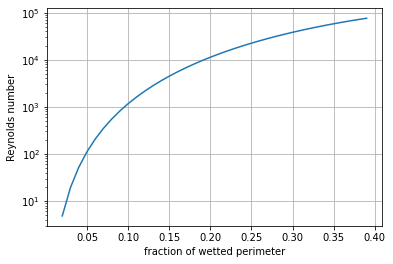

In [172]:
plt.figure()
plt.yscale('log')
plt.plot(fraction_w_perim, rey_num(f_w_perim=fraction_w_perim, D=100 * 1e-3, s=0.014))
#plt.plot(fraction_w_perim,rey_num(f_w_perim=fraction_w_perim,D=55*1e-3,s=0.014))
plt.xlabel('fraction of wetted perimeter')
plt.ylabel('Reynolds number')
plt.grid()
plt.show()

In [126]:
def Re(D_h, s=0.014, rho=997, mu=1.002e-3, g=9.81):
    '''
    :param D_h: hydraulic diameter
    :param s: slope of the tube
    :param rho: density of the liquid
    :param mu: liquid dynamic viscosity
    :param g: standard acceleration due to gravity
    :return: Reynolds number
    '''

    temp = 2 * g * D_h * s
    num = rho * np.power(temp, 4) * D_h
    den = np.power(0.316, 4) * mu
    v = np.power(num / den, 1 / 7)

    re = (rho * v * D_h) / mu

    return re

In [129]:
def mass_flow_no_pipe(f_w_perim, D=100 * 1e-3, s=0.014, rho=997):
    '''
    :param f_w_perim: fraction of wetted perimeter
    :param D: diameter of the outer tube
    :param s: slope of the tube
    :param rho: liquid density
    :return: mass flow kg/m^3 in the case of a tube with no inner pipe
    '''

    alpha = f_w_perim * np.pi
    P = alpha * D
    A = (np.power(D, 2) / 4) * (alpha - np.sin(2 * alpha) / 2)
    D_h = 4 * (A / P)

    f = 0.316 / (Re(D_h=D_h, s=s, rho=rho) ** 0.25)
    v = np.sqrt(2 * 9.81 * D_h * s / f)

    m = A * v * rho

    return m


In [131]:
m_list = mass_flow_no_pipe(np.arange(0.01, 0.35, 0.01))

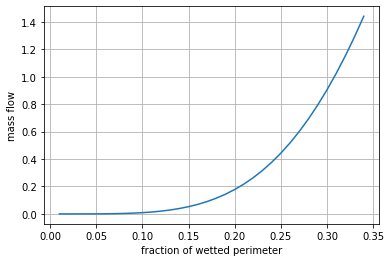

In [132]:
plt.figure()
plt.plot(np.arange(0.01, 0.35, 0.01), m_list)
plt.xlabel('fraction of wetted perimeter')
plt.ylabel('mass flow')
plt.grid()
plt.show()

In [133]:
def perimeter_limit_case(D, d):
    '''
    The function takes in input the outer and the inner diameters, and computes the wetted perimeter when the
    depth of the liquid is equal to the diameter of the inner pipe

    :param D: outer diameter
    :param d: inner pipe diameter
    :return: wetted perimeter

    '''

    y = d
    p = np.pi * d
    alpha = np.arccos(1 - 2 * y / D)
    P = alpha * D

    return P + p


In [134]:
def mass_flow_inner_pipe_high_liquid_level(f_w_perim, D, d, s, rho, g=9.81):
    '''
    :param f_w_perim: fraction of wetted perimeter
    :param D: outer diameter
    :param d: inner diameter
    :param s: slope of the tube
    :param rho: density of the liquid
    :param g: standard acceleration due to gravity
    :return: mass flow computed for a tube where the depth of thw liquid is higher than the diameter od the inner pipe
    '''

    p = np.pi * d
    P = f_w_perim * (np.pi * D + np.pi * d) - p
    alpha = P / D
    A = (np.power(D, 2) / 4) * (alpha - np.sin(2 * alpha) / 2)
    a = (np.pi / 4) * np.power(d, 2)
    A_h = A - a
    p_h = P + p
    print(p_h == f_w_perim * (np.pi * D + np.pi * d))
    D_h = 4 * (A_h / p_h)
    f = 0.316 / (Re(D_h=D, s=s, rho=rho) ** 0.25)
    v = np.sqrt(2 * g * D_h * s / f)

    m = A_h * v * rho
    return m



In [ ]:
def mass_flow_inner_pipe_low_liquid_level(f_w_perim, D, d, s, rho, g=9.81):
    '''
    :param f_w_perim: fraction of wetted perimeter
    :param D: outer diameter
    :param d: inner diameter
    :param s: slope of the tube
    :param rho: density of the liquid
    :param g: standard acceleration due to gravity
    :return: mass flow computed for a tube where the depth of thw liquid is less than the diameter od the inner pipe
    '''
    pass

In [155]:
def mass_flow(fraction, D, d=None, s=0.014, rho=997):
    '''
    The function return the mass flow given the fraction of wetted perimeter
    :param fraction: fraction of wetted perimeter
    :param D: diameter of the outer tube
    :param d: diameter of the inner tube
    :param inner_pipe: boolean values -> True=channel with inner pipe , False=channel without inner pipe
    :param s: slope of the tube
    :param rho: density of the liquid kg/m^3
    :return: mass flow kg/s
    '''

    if d:
        limit_case_perimeter = perimeter_limit_case(D=D, d=d)
        wetted_perimeter = (np.pi * D + np.pi * d) * fraction
        if wetted_perimeter >= limit_case_perimeter:
            m = mass_flow_inner_pipe_high_liquid_level(f_w_perim=fraction, D=D, d=d, s=s, rho=rho)
        else:
            m = mass_flof_inner_pipe_low_liquid_level(f_w_perim=fraction, D=D, d=d, s=s, rho=rho)
    else:
        m = mass_flow_no_pipe(f_w_perim=fraction, D=D, s=s, rho=rho)

    return m

In [152]:
w_perim = (0.4)
mass_flow(w_perim, D=100 * 1e-3, d=16 * 1e-3)

0.13256885167093432
0.1457698991265664
True


0.6772188469943552

In [160]:
wetted_perimeter_list = np.arange(0.01, 0.4, 0.01)
m_list = []

In [161]:
for w_p in wetted_perimeter_list:
    m_list.append(mass_flow(w_p, D=100 * 1e-3, d=16 * 1e-3))


0.13256885167093432
0.00364424747816416
the surface perim id greater
0.13256885167093432
0.00728849495632832
the surface perim id greater
0.13256885167093432
0.010932742434492479
the surface perim id greater
0.13256885167093432
0.01457698991265664
the surface perim id greater
0.13256885167093432
0.0182212373908208
the surface perim id greater
0.13256885167093432
0.02186548486898496
the surface perim id greater
0.13256885167093432
0.025509732347149115
the surface perim id greater
0.13256885167093432
0.02915397982531328
the surface perim id greater
0.13256885167093432
0.03279822730347744
the surface perim id greater
0.13256885167093432
0.036442474781641594
the surface perim id greater
0.13256885167093432
0.04008672225980576
the surface perim id greater
0.13256885167093432
0.043730969737969916
the surface perim id greater
0.13256885167093432
0.04737521721613408
the surface perim id greater
0.13256885167093432
0.051019464694298244
the surface perim id greater
0.13256885167093432
0.05466371

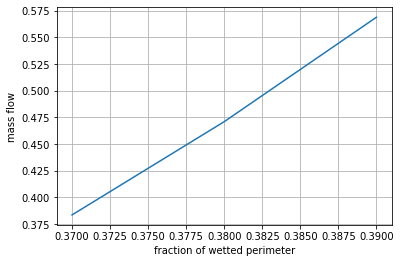

In [162]:
plt.figure()
plt.plot(wetted_perimeter_list, m_list)
plt.xlabel('fraction of wetted perimeter')
plt.ylabel('mass flow')
plt.grid()
plt.show()

In [4]:
from sympy import solve, sin, cos, pi, Symbol, Eq

In [5]:
alpha = Symbol('alpha cos(alpha)')

In [8]:
solve(alpha + cos(alpha) - 0.5, alpha)

NotImplementedError: multiple generators [alpha, cos(alpha)]
No algorithms are implemented to solve equation alpha + cos(alpha) - 1/2

In [9]:
from scipy.optimize import fsolve

In [10]:
import numpy as np

In [16]:
def func(x):
    return x + np.cos(x) - 0.5

In [17]:
root = fsolve(func, -0.5)

In [18]:
root

array([-0.41508289])

In [15]:
0.25 + np.sin(0.25)

0.49740395925452296

In [165]:
D = 100 * 1e-3
d = 16 * 1e-3
f = 0.1
w_p = f * (np.pi * D + np.pi * d)


def func(x):
    return d * np.cos((w_p - D * x) / d) - D * np.cos(x) + D - d



In [170]:
root = fsolve(func, 0.4)

In [171]:
root

array([0.25916179])

In [217]:
#limit case
h_2 = 0.016
alpha = np.arccos(1 - 2 * h_2 / D)
a = np.pi * np.power(h_2, 2) / 4
A = (np.power(D, 2) / 4) * (alpha - np.sin(2 * alpha) / 2)
A - a

0.0006100617114797054

In [215]:
D = 0.100
p = D * np.pi
p_w = 0.2 * p
alpha = p_w / D
A = (np.power(D, 2) / 4) * (alpha - np.sin(2 * alpha) / 2)
h_1 = D / 2 * (1 - np.cos(alpha))

In [218]:
h_1

0.009549150281252628

In [214]:
def func(x):
    x-np.sin(2*x)/2-4*A/np.power(D,2)

root = fsolve(func, 0.5)
root

C:\Miniconda3\envs\simulator\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([0.5])

In [208]:
D = 0.100
p = D * np.pi
p_w = 0.25 * p
alpha = p_w / D
A = (np.power(D, 2) / 4) * (alpha - np.sin(2 * alpha) / 2)
h_1 = D / 2 * (1 - np.cos(alpha))

In [209]:
A

0.0007134954084936208